## Multiple Linear Regression and Regression Error Metrics

## Import library


### Splitting the Data into Training and Testing Sets

Before training our model, we need to split the dataset into two parts: a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate its performance. This helps us understand how well our model is likely to perform on unseen data. Typically, about 70-80% of the data is used for training, and the remaining 20-30% is used for testing.

In scikit-learn, we can use the `train_test_split` function to randomly split the data into training and testing sets. The `test_size` parameter determines the proportion of the data that is allocated to the testing set.



### Linear Regression Model

Linear Regression is a statistical model that examines the linear relationship between two (Simple Linear Regression) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). The model finds the best fit line, called the regression line, that represents this relationship.

In scikit-learn, the `LinearRegression` class is used to implement a Linear Regression model. Here are some of the important parameters that can be tuned in this model:

- **fit_intercept**: Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations.
- **normalize**: If True, the predictors will be normalized before regression by subtracting the mean and dividing by the L2-norm.
- **copy_X**: If True, X will be copied; else, it may be overwritten.
- **n_jobs**: The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems.

[Scikit-learn LinearRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



### Other Regression Models in Scikit-learn

Scikit-learn offers a variety of regression models, each suitable for different types of problems and data. Some of the commonly used regression models include:

- **Ridge Regression**: Linear regression with L2 regularization. Useful when there is multicollinearity in the data.
- **Lasso Regression**: Linear regression with L1 regularization. Useful for feature selection.
- **ElasticNet Regression**: Linear regression with both L1 and L2 regularization. A combination of Ridge and Lasso.
- **DecisionTreeRegressor**: A non-linear regression model that partitions the feature space into regions and assigns a constant value to each region.
- **RandomForestRegressor**: An ensemble of decision trees. Robust to overfitting and capable of capturing complex patterns.

Choosing the right model depends on the nature of the data, the problem at hand, and the trade-off between interpretability and accuracy. It's common practice to try multiple models and evaluate their performance to select the best one.

[Scikit-learn Regression Models](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)


In [4]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [5]:

import numpy as np  # For numerical operations
import pandas as pd  # For handling tabular data
import seaborn as sns  # For advanced plotting
import matplotlib.pyplot as plt  # For basic plotting
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # For implementing Linear Regression model
from sklearn import metrics  # For evaluating model performance
from yellowbrick.regressor import ResidualsPlot  # For plotting residuals

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,7)


## Read Dataset

In [8]:

# Load the Advertising dataset
# file_path = 'Advertising.csv'
# df = pd.read_csv(file_path)

# Display the first few rows of the dataset
# df.head()

file_path = 'Advertising.csv'
df = pd.read_csv(file_path)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


## Data Preparation


Before building a machine learning model, it's crucial to explore and understand the dataset. This step helps us identify any anomalies, outliers, or errors in the data. Additionally, it provides insights into the distribution and relationships between different features.

Here, we'll examine the shape of the dataset, explore its basic information, and look at summary statistics to better understand the characteristics of the data.


In [10]:
# df.shape
df.shape

(200, 4)

In [11]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
# df.describe()
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Distribution of features


Visualizing the distribution of features is an essential step in understanding the characteristics of our dataset. It helps us identify patterns, outliers, and the overall spread of data points for each feature. In this section, we use interactive Altair plots to visualize the distribution of the 'TV', 'radio', 'newspaper', and 'sales' features.


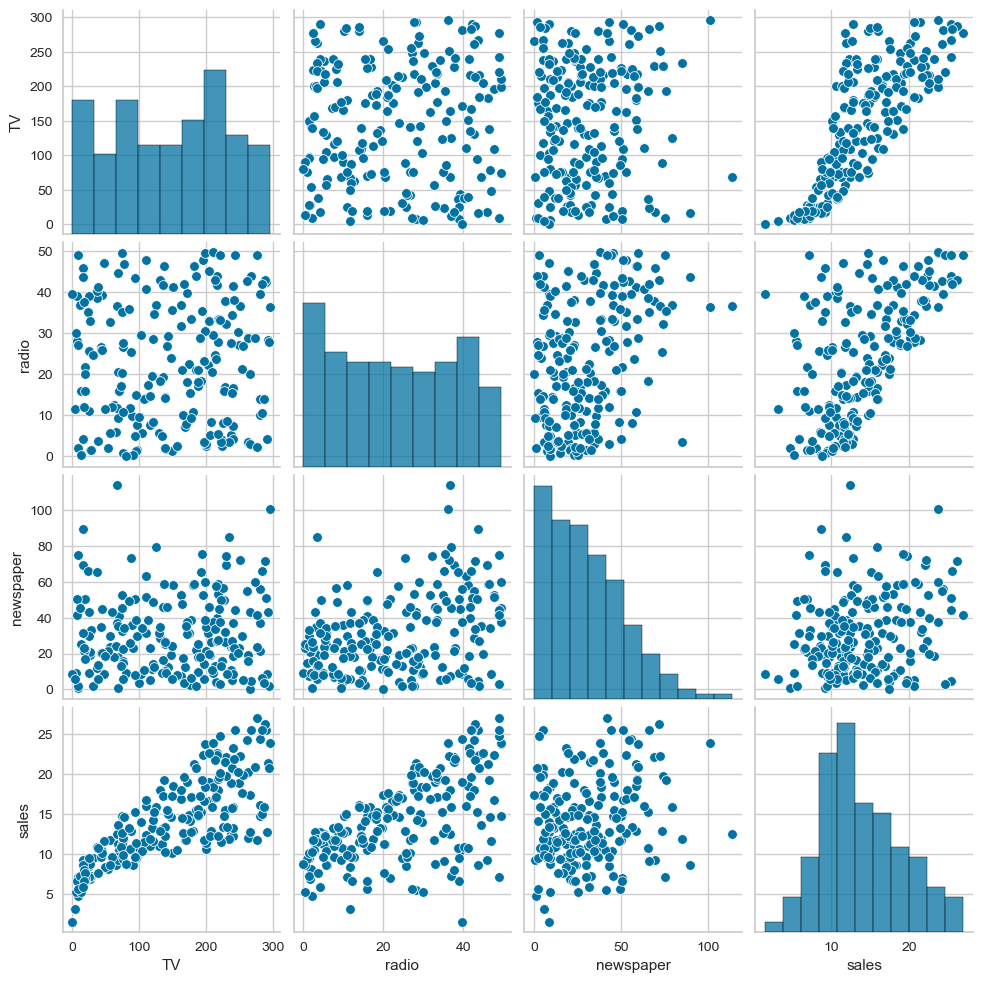

In [14]:
# # Plotting the distribution of features using interactive Altair plots
# features = ['TV', 'radio', 'newspaper', 'sales']
# for feature in features:
#     chart = alt.Chart(df).mark_bar().encode(
#         alt.X(feature, bin=alt.Bin(maxbins=30), title=feature),
#         y='count()',
#         tooltip=[feature, 'count()']
#     ).interactive().properties(
#         title=f'Distribution of {feature}',
#         width=800,
#         height=400
#     )
#     display(chart)

# sns.pairplot(df)
# plt.show()

sns.pairplot(df)
plt.show()


In [15]:
# df.corr()

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


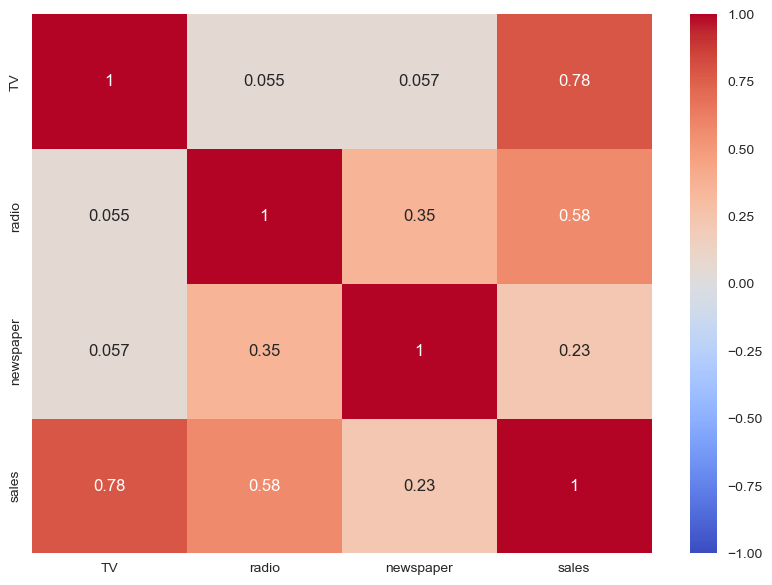

In [17]:
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.show();

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Train-Test Split

In [19]:
# If you're not using anaconda:
# pip install scikit-learn
# conda install scikit-learn

In [18]:
# X = df.drop(columns="sales")  # df[["TV", "radio", "newspaper"]]
# y = df["sales"]


X = df.drop(columns='sales')
y = df['sales']

In [19]:
# from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split

# We will use this function to split the data into train/test

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Default test_size is 0.25. The idea here is to get as many data points in the train set as possible without hurting the
# testing of the model. The choice is somewhat arbitrary.

In [21]:
# df.sample(15)

df.sample(15)

,TV,radio,newspaper,sales
90,134.3,4.9,9.3,11.2
98,289.7,42.3,51.2,25.4
30,292.9,28.3,43.2,21.4
166,17.9,37.6,21.6,8.0
71,109.8,14.3,31.7,12.4
77,120.5,28.5,14.2,14.2
144,96.2,14.8,38.9,11.4
58,210.8,49.6,37.7,23.8
198,283.6,42.0,66.2,25.5
125,87.2,11.8,25.9,10.6


In [22]:
# print("Train features shape : ", X_train.shape)
# print("Train target shape   : ", y_train.shape)
# print("Test features shape  : ", X_test.shape)
# print("Test target shape    : ", y_test.shape)


print('Train features shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test features shape: ', X_test.shape)
print('Test features shape: ', y_test.shape)

Train features shape:  (160, 3)
Train target shape:  (160,)
Test features shape:  (40, 3)
Test features shape:  (40,)


In [23]:
# X_train

X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [24]:
# X_test
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [27]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [28]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [29]:
from sklearn.linear_model import LinearRegression

# Import LinearRegression class from scikit-learn


### Interpreting Model Coefficients

After training the Linear Regression model, the `coef_` attribute contains the coefficients for the predictor variables. The coefficients represent the change in the dependent variable (in this case, 'sales') for a one-unit change in the predictor variable, while keeping other predictors constant. For example, if the coefficient for 'TV' is 0.04, it means that for every additional unit of TV advertising, sales would increase by 0.04 units.

Positive coefficients indicate a positive correlation between the predictor variable and the dependent variable, while negative coefficients indicate a negative correlation.



### Error Metrics, R² Score, and Adjusted R² Score

After training a regression model, we need to evaluate its performance using various error metrics. Here are some commonly used error metrics in regression analysis:

- **Mean Absolute Error (MAE)**: The average of the absolute differences between the actual and predicted values.
- **Mean Squared Error (MSE)**: The average of the squares of the differences between the actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of the MSE. It is in the same units as the dependent variable.

In addition to these, the R² score is used to determine how well the model explains the variance in the dependent variable. The R² score ranges from 0 to 1, with higher values indicating better fit. However, one limitation of the R² score is that it tends to increase as more predictor variables are added to the model, regardless of whether they improve the model’s fit.

To address this, the Adjusted R² score can be used. It adjusts the R² score based on the number of predictor variables, penalizing the addition of irrelevant variables. The Adjusted R² score is especially useful in multiple linear regression where there are multiple predictors.

[Scikit-learn Metrics and Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)



### Residuals and ResidualsPlot

Residuals are the differences between the actual and predicted values produced by the regression model. Analyzing residuals is essential for diagnosing the fit of the model. A well-fitting model should have residuals that are randomly distributed around zero, with no clear patterns or trends.

The `ResidualsPlot` from the Yellowbrick library visualizes the distribution of residuals. The plot displays the residuals on the y-axis and the predicted values on the x-axis. It also includes a horizontal line at y=0, representing the point where the predicted value equals the actual value. Examining the residuals plot helps identify potential issues with the model, such as heteroscedasticity or non-linearity.

[Yellowbrick ResidualsPlot Documentation](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)



### Prediction Error for Linear Regression

Prediction error is the difference between the actual and predicted values for each observation in the dataset. A model with lower prediction error is considered to be a better-fitting model. Visualizing the prediction error can help assess the model’s accuracy and identify areas where the model may be underperforming.


In [30]:
model = LinearRegression()

# Instantiate the class

In [31]:
model.fit(X_train, y_train)

# our `model` is an object of the `LinearRegression` class. We can now access its methods.
# The `fit` method, in scikit-learn, is always used to learn some parameters about the data.

LinearRegression()

In [32]:
y_pred = model.predict(X_test) # Since the `model` object is now the trained linear regression model, we can invoke the `predict`
# method to get predictions on the test set.
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [33]:
X_train.head(1)

,TV,radio,newspaper
79,116.0,7.7,23.1


In [34]:
model.coef_

# The coefficients listed in the `coef_` attribute is in the same order as with the features of our X_train.

array([0.04472952, 0.18919505, 0.00276111])

In [35]:
model.intercept_

2.9790673381226327

In [36]:
X_test.loc[[95]]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [37]:
y_test.loc[95]

16.9

In [38]:
model.predict(X_test.loc[[95]])
# ML algorithms accept 2-dimensional data, even if you have only one instance (observation point).

array([16.4080242])

In [39]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [40]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627
115,12.6,13.105592,-0.505592,0.255623,0.505592
69,22.3,21.057192,1.242808,1.544572,1.242808
170,8.4,7.461010,0.938990,0.881702,0.938990
174,11.5,13.606346,-2.106346,4.436693,2.106346
45,14.9,15.155070,-0.255070,0.065061,0.255070


In [41]:
result_sample = comparing.iloc[:, :3]
result_sample

# Selecting only the first 3 columns to visualise the model performance.

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


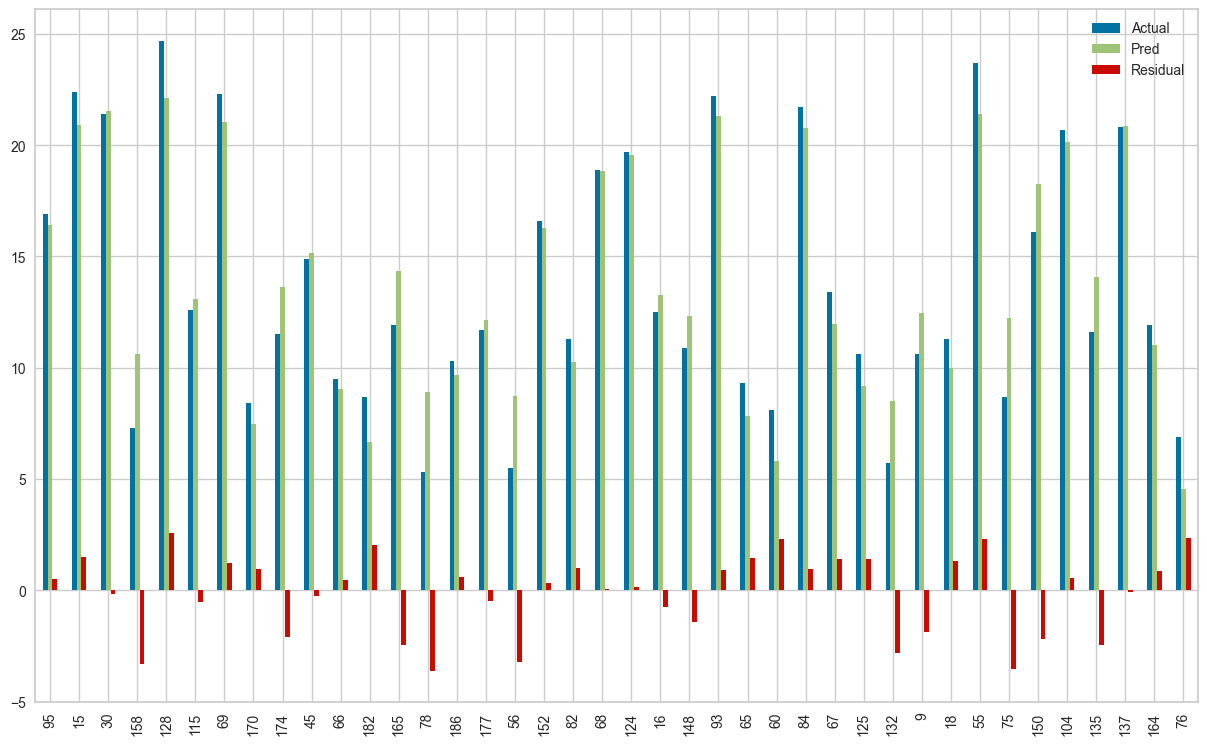

In [42]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show();

## Error Metrics

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
R2_score = r2_score(y_test, y_pred)
R2_score

# We talked about R2 score. Anybody remembers?
# Statistically R2 is between [0, 1]
# In sklearn, [-np.inf, 1]

0.8994380241009119

In [45]:
mae = mean_absolute_error(y_test, y_pred)  # comparing.ABS.sum()/X_test.shape[0]
mae

# Take the absolute values of residuals and sum them up. Divide the summation by the number of observation points.

1.4607567168117608

In [46]:
# comparing.ABS.sum()/X_test.shape[0]

In [47]:
X_test.shape

(40, 3)

In [48]:
mse = mean_squared_error(y_test, y_pred)  # comparing.LSE.sum()/X_test.shape[0]
mse

# Square the residuals individually and sum them up. Divide the summation by the number of observation points.
# Penalises large errors. Difficult to interpret as it changes the scale.

3.1740973539761073

In [49]:
# Comparing.LSE.sum()/X_test.shape[0]

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #(comparing.LSE.sum()/X_test.shape[0])**0.5
rmse

# Square the residuals individually and sum them up. Divide the summation by the number of observation points. And then square root the result.
# Penalises large errors. Easy to interpret as we bring back the scale of the values to normal level by square rooting it.

1.781599661533451

In [51]:
# (comparing.LSE.sum()/X_test.shape[0])**0.5

In [52]:
sales_mean = df["sales"].mean()
sales_mean

# Let's take the mean of our target to compare how well our model is doing with respect to the target mean.
# (how much better our model is than just predicting the mean of the target every single time)

14.0225

In [53]:
mae / sales_mean

# Margin of error of our model according to MAE is 10%.

0.10417234564533862

In [54]:
rmse / sales_mean

# Margin of error of our model according to RMSE is 13%. Notice that margin of error for RMSE is greater than that of MAE.
# That is due to the fact that RMSE penalises large errors, hence the result is always larger compared to MAE.

0.12705292647769306

## Adjusted R2 score

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [55]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations (rows)
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# Every added independent feature, in the worst-case scenario, will not change
# the r2 score for better or worse. In the best-case scenario, it will improve the r2 score.
# This creates a disadvantage when interpreting the r2 score if we have too many
# independent features because we don’t account for the number of independent features
# it took us to get to a certain r2 score. The adjusted r2 score does exactly that.
# It accounts for the number of independent features it took us to achieve a certain r2 score,
# making it a more robust estimate of the true r2 score in situations where we have a lot of
# independent features. Scikit-learn does not have a built-in function to calculate
# the adjusted r2 score out of the box, so we implemented our own function to do that.

In [56]:
X.shape

(200, 3)

In [57]:
adj_r2(y_test, y_pred, X)

0.8978988101840891

## What is the concept of punishment for RMSE error metric?

In [58]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]} # 5300

# Let's demonstrate with an example how RMSE penalises large errors.

In [59]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [60]:
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [61]:
#mae
y_test_ex = df_2.Actual
y_pred_ex = df_2.pred

mean_absolute_error(y_test_ex, y_pred_ex)

200.0

In [62]:
#rmse

np.sqrt(mean_squared_error(y_test_ex, y_pred_ex))

# When we don't have large errors; that is, the actual and predicted values are relatively close to each other,
# RMSE and MAE scores will also be relatively close to each other due to the lack of large errors.

209.76176963403032

In [63]:
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 6000]} # 5300

# We added a way more off prediction now to represent a large mistake.

In [64]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,6000


In [65]:
#mae

y_test_ex = df_3.Actual
y_pred_ex = df_3.pred

mean_absolute_error(y_test_ex, y_pred_ex)

340.0

In [66]:
#rmse

np.sqrt(mean_squared_error(y_test_ex, y_pred_ex))

# As you can see, when large errors are present, RMSE gets much larger than MAE. This is due to the fact that RMSE penalises
# large errors by squaring them, whereas MAE does not do that. The larger errors your model makes, the more RMSE deviates from MAE.
# Hence, in case of large errors, RMSE is a better estimate of model performance than MAE, since it accounts for large errors when large errors are undesirable.

475.3945729601885

## Evaluation Model

In [67]:
def eval_metric(actual, pred):
    """
    Prints out to the console MAE, MSE and RMSE of a regression model,
    given the actual and predicted values of the target.

        Parameters:
            actual: A collection of actual target values.
            pred: A collection of predicted target values.

        Returns:
            None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

    return None

In [68]:
eval_metric(y_test, y_pred)

# Get the evaluation metrics on the test set

Model testing performance:
--------------------------
R2_score : 0.8994380241009119
MAE      : 1.4607567168117608
MSE      : 3.1740973539761073
RMSE     : 1.781599661533451


In [69]:
y_train_pred = model.predict(X_train)

In [70]:
eval_metric(y_train, y_train_pred)

# Get the evaluation metrics on the train set

Model testing performance:
--------------------------
R2_score : 0.8957008271017817
MAE      : 1.1984678961500135
MSE      : 2.705129423081414
RMSE     : 1.644727765644337


## Is data suitable for linear regression?

For future reference:

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

## Plotting residuals

In [71]:
residuals = y_test-y_pred

# Calculate the residuals. We will plot them later on.

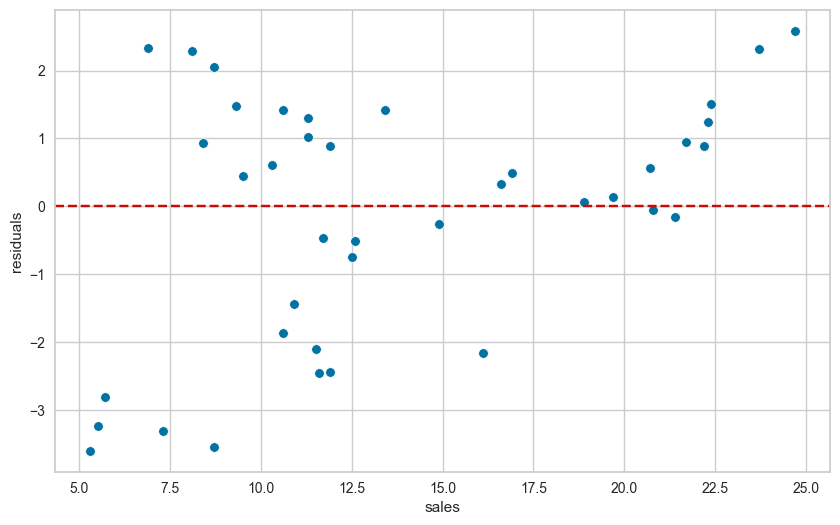

In [72]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

# There are 2 very fundamental and important assumptions we make on our residuals:
# 1- They are normally distributed.
# 2- They are randomly spread around the mean of 0. (This phenomenon is called homoscedasticity)

In [29]:
import scipy.stats as stats

In [30]:
sns.kdeplot(residuals)
plt.show();

# You can check kdeplot or histogram to evaluate the normality of the residuals.

NameError: name 'residuals' is not defined

In [31]:
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

# You can also check QQ-normality plot to check if residuals are normally distributed.

NameError: name 'residuals' is not defined

In [32]:
from scipy.stats import skew
skew(residuals)

# Check the skewness of the residuals. This is another way of checking your data
# against normality, with a more formal mathematical calculation.
# If your skewness score is between [-1, 1], you could say that it's more or less normally distributed.
# 0 is the perfect score, means perfectly normally distributed, which you'll probably never get.

NameError: name 'residuals' is not defined

In [ ]:
# pip install yellowbrick (for shameless non-anaconda users)
# conda install -c districtdatalabs yellowbrick  (for glorious anaconda users)
# (-c means channel. So we are using the channel "districtdatalabs" to download the package.)

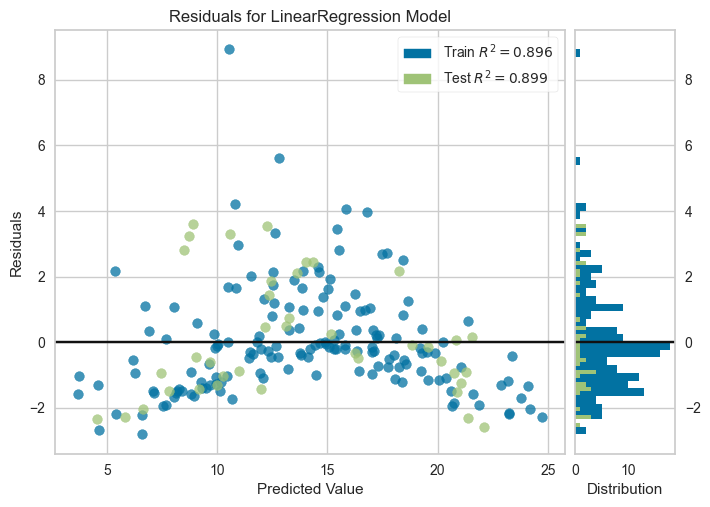

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

# A much better way of visualising residuals is using `yellowbrick.regressor.ResidualsPlot`
# This saves us manual labour.
# yellowbrick is a great library specifically created to visualise scikit-learn models.

## Prediction Error for LinearRegression

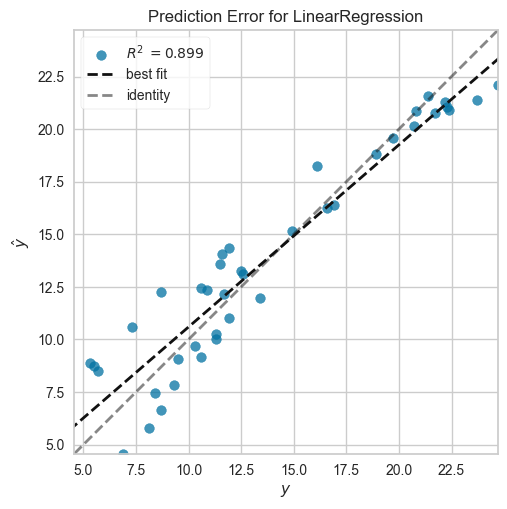

In [ ]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();


# On the x-axis, we've got the real target values, whereas on the y-axis, we've got the predicted target values.
# The greyed-out dashed line is the reference line, where predictions would meet our real target values should they be perfect.
# But they're not perfect. Hence, we have the black dashed line, showing how far apart our residuals from the ideal perfect.

## Retraining Model on Full Data

In [ ]:
final_model = LinearRegression()

# After we check our model and conclude that this model is good enough, we can train a brand new model, however,
# on the entire dataset this time, as we no longer need to check the model performance once we conclude it's good enough.

In [ ]:
final_model.fit(X, y)

# Notice we are training the model on the entire dataset.

LinearRegression()

## Coefficients

In [ ]:
final_model.coef_

# Let's check the model coefficients. Keep in mind that these coefficients are created for the independent features.
# They are in the same order as with our columns in X.

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
# The bias/intercept of the model
final_model.intercept_

2.9388893694594014

In [ ]:
X.head()

# These columns are in the same order as with our coefficients from above.

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Prediction on New Data

In [ ]:
adv = [[150, 20, 15]]

# Let's create a new observation point on which we will get a prediction.
# Keep in mind that even if you're getting prediction on a single observation,
# it still has to be represented as 2-D because ML models in scikit-learn accepts only 2-D data.

In [ ]:
adv

[[150, 20, 15]]

In [ ]:
final_model.predict(adv)

# Getting the prediction

/Users/mohammadzainabbas/micromamba/envs/sda_ml/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.55862413])

In [ ]:
adv_2 = [[160, 20, 15]]

# We increased the first value by 10 (this value represents the TV value in this observation) and kept all else the same.

In [ ]:
final_model.predict(adv_2)

# Get the predictions.

/Users/mohammadzainabbas/micromamba/envs/sda_ml/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.01627059])

In [ ]:
14.01627059 - 13.55862413

# The difference between the predicted values is the coefficient of TV multiplied by 10.
# This makes sense, right? Because we only increased the TV value by 10.

0.4576464599999994

## The effect of features on the predicted label

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
df.describe()

# To be able to determine which independent feature is more important by looking at their coefficients,
# they all need to be on the same scale. We will talk more about this in the upcoming lectures.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000
